## 제6장. 머신러닝
## 제3절. 다중 회귀

### 1. 릿지
(1) scikit-learn의 Ridge  
* 코드 실습

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [2]:
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    ridge=Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


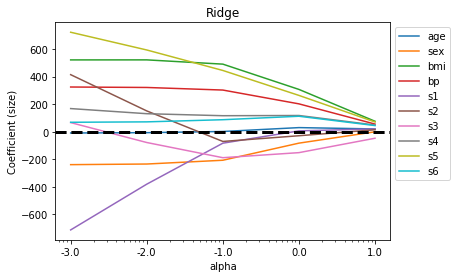

In [4]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

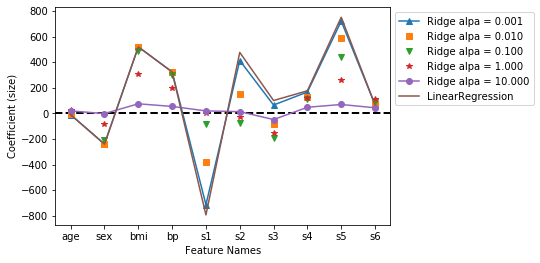

In [5]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x,y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

### 2. 라쏘
(1) scikit-learn의 Lasso
* 코드 실습

In [6]:
from sklearn.linear_model import Lasso

alpha=np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    lasso=Lasso(alpha=a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns=x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


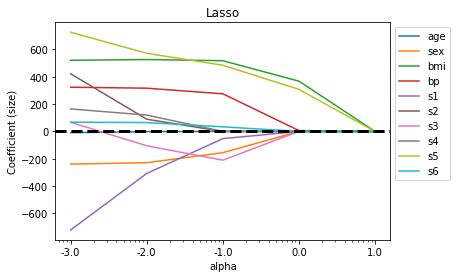

In [8]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

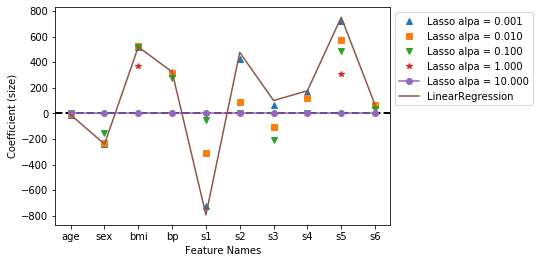

In [10]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

### 3. 엘라스틱넷
(1) scikit-learn의 ElasticNet
* 코드 실습

In [11]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    ela=ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela=pd.DataFrame(data, index=alpha)
df_ela.columns=x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


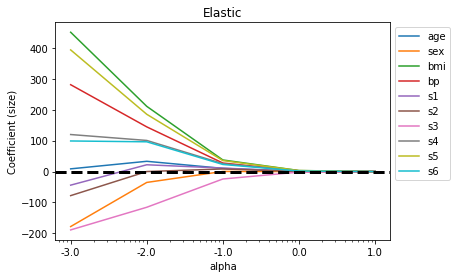

In [12]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

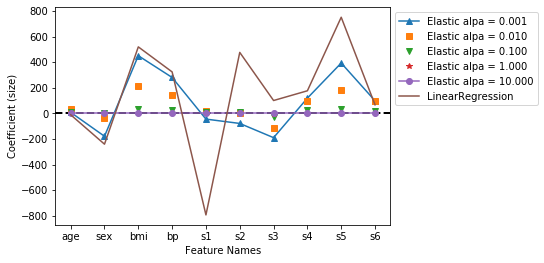

In [13]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpa = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpa = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpa = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpa = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))